In [1]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Stationary/Non-Stationary
<p>An stationary data is generating from a data generation process with constant parameters. Below Series A is stationary while parameters of Series B changes over time. Many statistical test is not useful performing on an unstationary dataset </p>

In [2]:
def generating(params):
    mu = params[0]
    sigma = params[1]
    
    return np.random.normal(mu, sigma)

<h3> Series A </h3>

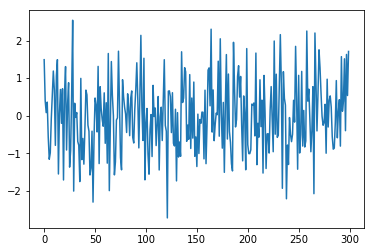

In [3]:
params = (0, 1)
T = 300
A = pd.Series(index = range(T))

for t in range(T):
    A[t] = generating(params)
    
plt.plot(A)
plt.show()

<h3> Series B </h3>
<p> Mean number is not useful for Series B </p>

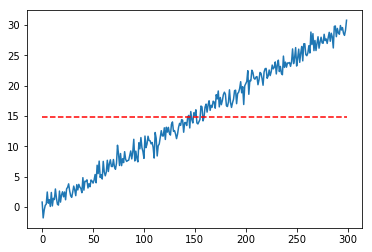

In [4]:
T = 300
B = pd.Series(index = range(T))


for t in range(T):
    params = (t*0.1, 1)
    B[t] = generating(params)

mean = B.mean()
plt.plot(B)
plt.plot(range(T), mean*np.ones(T),  'r--')
plt.show()

# Testing for stationary

In [5]:
def test_stationary(X, threshold=0.01):
    pvalue = adfuller(X)[1]
    if pvalue < threshold:
        print 'p-value = ' + str(pvalue) + ' The series is likely stationary.'
        return True
    else:
        print 'p-value = ' + str(pvalue) + ' The series is likely non-stationary.'
        return False

<h3>Inductively Building Up Orders of Integration</h3>

If one takes an $I(0)$ series and cumulatively sums it (discrete integration), the new series will be $I(1)$. Notice how this is related to the calculus concept of integration. The same relation applies in general, to get $I(n)$ take an $I(0)$ series and iteratively take the cumulative sum $n$ times.

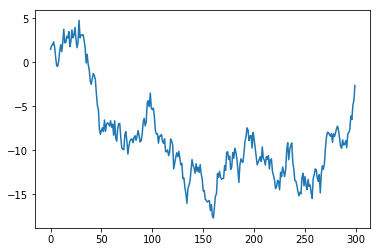

In [6]:
# I(1)
A1 = np.cumsum(A)

plt.plot(A1)
plt.show()

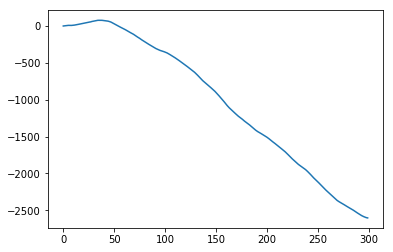

In [7]:
# I(2)
A2 = np.cumsum(A1)

plt.plot(A2)
plt.show()

In [8]:
# read in Apple stock. Such time series is usually non-stationary
aapl = pd.read_csv("C:/Users/j291414/Desktop/AAPL.csv")
test_stationary(aapl['Close'])

p-value = 0.974609313552 The series is likely non-stationary.


False

p-value = 0.0 The series is likely stationary.


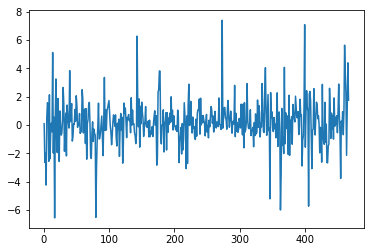

In [9]:
# price delta, in this case, is stationary
X = aapl['Close']
X1 = X.diff()[1:]
test_stationary(X1)
plt.plot(X1)
plt.show()

p-value = 0.0 The series is likely stationary.


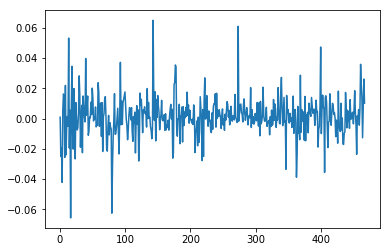

In [10]:
# percentage return is, in this case, stationary
X2 = X.pct_change()[1:]
test_stationary(X2)
plt.plot(X2)
plt.show()

# Cointegration

In [11]:
# Length of series
N = 100

# Generate a stationary random X1
X1 = np.random.normal(0, 1, N)
# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1)
X1.name = 'X1'

# Make an X2 that is X1 plus some noise
X2 = X1 + np.random.normal(0, 1, N)
X2.name = 'X2'

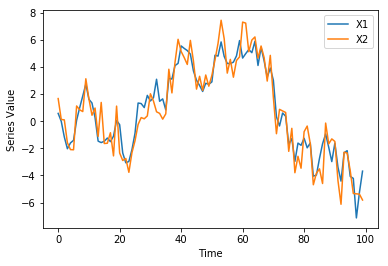

In [12]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name]);
plt.show()